In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Pratice Ploty
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))

# ***Import data and observe overview***

In [ ]:
train = pd.read_csv("train_files/stock_prices.csv", parse_dates=['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Year,Month,Day
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,2017,1,4
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324,2017,1,4
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154,2017,1,4
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053,2017,1,4
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026,2017,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816,2021,12,3
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478,2021,12,3
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302,2021,12,3
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098,2021,12,3


In [ ]:
print("Number of Security: ",train['SecuritiesCode'].unique().shape)
print("Time Range: ",str(train['Date'].min())[:10], " ~ ", str(train['Date'].max())[:10])

Number of Security:  (2000,)
Time Range:  2017-01-04  ~  2021-12-03


# ***Single Equity - Close/Volume/Return***

In [ ]:
sec_code = 1301
plot_df = train[train['SecuritiesCode']==sec_code]

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=plot_df['Date'],
               y=plot_df['Close'],
               name = 'Stock Price'))

fig.add_trace(
    go.Bar(x=plot_df['Date'],
           y=plot_df['Volume'],
           name = 'Volume',
           yaxis="y2",))

fig.add_trace(
    go.Scatter(x=plot_df['Date'],
           y=plot_df['Target'],
           name = 'Target Return',
           yaxis="y3",
           opacity=0.3))

fig.update_layout(template=temp,
                  title='stock_price/return movement for: ' + str(sec_code), 
                  hovermode='closest',
                  margin=dict(l=50, r=50, t=25, b=25),
                  height=500, 
                  width=1300, 
                  showlegend=True,

                xaxis=dict(domain=[0.65, 0.35]),

                yaxis = dict(title="Stock Price",
                            titlefont=dict(color="black"),
                            tickfont=dict(color="black")),

                yaxis2 = dict(title="Trade Volume",
                            titlefont=dict(color="gray"),
                            tickfont=dict(color="gray"),
                            overlaying="y", # specifyinfg y - axis has to be separated
                            side="right",), # specifying the side the axis should be present
                
                yaxis3 = dict(
                            anchor="free", # specifying x - axis has to be the fixed
                            overlaying="y", # specifyinfg y - axis has to be separated
                            side="right",) # specifying the side the axis should be present) # specifying the position of the axis),
    )


# fig.update_traces(textposition="top right")
fig.data[0].line.color = "Black"
fig.data[2].line.color = "blue"
fig.show()

# ***Equity Sector Performance***

In [ ]:
stock_list = pd.read_csv("stock_list.csv")
stock_list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


In [ ]:
train_with_stock_list = pd.merge(train,stock_list[['SecuritiesCode','Name','17SectorCode','17SectorName','IssuedShares','MarketCapitalization','Section/Products']],left_on='SecuritiesCode',right_on='SecuritiesCode')
train_with_stock_list = train_with_stock_list[train_with_stock_list['Section/Products']!='ETFs/ ETNs']
train_with_stock_list

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,Target,Year,Month,Day,Name,17SectorCode,17SectorName,IssuedShares,MarketCapitalization,Section/Products
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,...,0.000730,2017,1,4,"KYOKUYO CO.,LTD.",1,FOODS,10928283.0,3.365911e+10,First Section (Domestic)
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,...,0.002920,2017,1,5,"KYOKUYO CO.,LTD.",1,FOODS,10928283.0,3.365911e+10,First Section (Domestic)
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,...,-0.001092,2017,1,6,"KYOKUYO CO.,LTD.",1,FOODS,10928283.0,3.365911e+10,First Section (Domestic)
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,...,-0.005100,2017,1,10,"KYOKUYO CO.,LTD.",1,FOODS,10928283.0,3.365911e+10,First Section (Domestic)
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,...,-0.003295,2017,1,11,"KYOKUYO CO.,LTD.",1,FOODS,10928283.0,3.365911e+10,First Section (Domestic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211129_4169,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,1.0,NaN,...,0.009972,2021,11,29,ENECHANGE Ltd.,10,"IT & SERVICES, OTHERS",14733190.0,2.934851e+10,Mothers (Domestic)
2332527,20211130_4169,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,1.0,NaN,...,0.060649,2021,11,30,ENECHANGE Ltd.,10,"IT & SERVICES, OTHERS",14733190.0,2.934851e+10,Mothers (Domestic)
2332528,20211201_4169,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,1.0,NaN,...,-0.039894,2021,12,1,ENECHANGE Ltd.,10,"IT & SERVICES, OTHERS",14733190.0,2.934851e+10,Mothers (Domestic)
2332529,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,NaN,...,-0.127424,2021,12,2,ENECHANGE Ltd.,10,"IT & SERVICES, OTHERS",14733190.0,2.934851e+10,Mothers (Domestic)


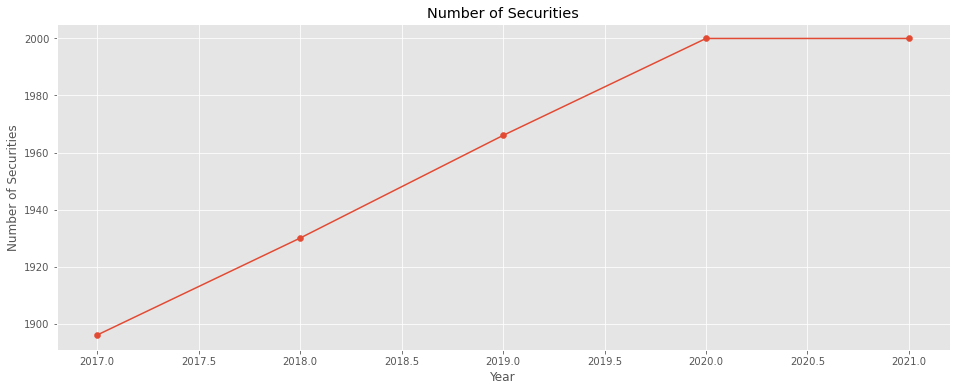

In [ ]:
fig,ax = plt.subplots(figsize=(16,6))
ax.set_title('Number of Securities')
ax.scatter(train_with_stock_list['Year'].unique(),[ len(df['SecuritiesCode'].unique()) for name,df in train_with_stock_list.groupby(['Year']) ])
ax.plot(train_with_stock_list['Year'].unique(),[ len(df['SecuritiesCode'].unique()) for name,df in train_with_stock_list.groupby(['Year']) ])
ax.set_xlabel('Year')
ax.set_ylabel('Number of Securities')
plt.show()

number of security does fluctuate over time.

In [ ]:
# train_with_stock_list = train_with_stock_list[train_with_stock_list['Date']>dt.datetime(2020,1,1)] # might want to drop period without comprehensize dataset.
train_with_stock_list['DoD'] = train_with_stock_list.groupby(['SecuritiesCode','Name'])['Close'].pct_change()

equity_std = train_with_stock_list.groupby(['SecuritiesCode','Name'])['DoD'].std().reset_index(name='STD. DoD') 
equity_mean = train_with_stock_list.groupby(['SecuritiesCode','Name'])['DoD'].mean().reset_index(name='AVG. DoD') 

equity_std['Annual Volatility'] = equity_std['STD. DoD'] * np.sqrt(252)
equity_mean['Annual Return'] = equity_mean['AVG. DoD'] * 252

equity_convex_hull = pd.merge(equity_mean,equity_std)
equity_convex_hull = pd.merge(equity_convex_hull,stock_list[['SecuritiesCode','17SectorName']])
equity_convex_hull

,SecuritiesCode,Name,AVG. DoD,Annual Return,STD. DoD,Annual Volatility,17SectorName
0,1301,"KYOKUYO CO.,LTD.",0.000152,0.038337,0.012835,0.203742,FOODS
1,1332,"Nippon Suisan Kaisha,Ltd.",0.000194,0.048803,0.018663,0.296264,FOODS
2,1333,Maruha Nichiro Corporation,-0.000122,-0.030734,0.016442,0.261015,FOODS
3,1375,"YUKIGUNI MAITAKE CO.,LTD.",-0.001653,-0.416629,0.015690,0.249065,FOODS
4,1376,"KANEKO SEEDS CO.,LTD.",0.000022,0.005616,0.017414,0.276439,FOODS
...,...,...,...,...,...,...,...
1995,9990,SAC'S BAR HOLDINGS INC.,-0.000512,-0.129108,0.019395,0.307886,RETAIL TRADE
1996,9991,GECOSS CORPORATION,-0.000145,-0.036634,0.017207,0.273157,COMMERCIAL & WHOLESALE TRADE
1997,9993,"YAMAZAWA CO.,LTD.",0.000007,0.001699,0.011827,0.187754,RETAIL TRADE
1998,9994,YAMAYA CORPORATION,0.000418,0.105397,0.018113,0.287537,RETAIL TRADE


In [ ]:
fig = go.Figure() # hover text goes here

for sector in equity_convex_hull['17SectorName'].unique():
    
    equity_convex_plot_df = equity_convex_hull[equity_convex_hull['17SectorName']==sector]

    fig.add_trace(go.Scatter(x=equity_convex_plot_df['Annual Volatility'],
                            y=equity_convex_plot_df['Annual Return'],
                            mode='markers',
                            name=sector,
                            text=equity_convex_plot_df['Name']))

fig.update_layout(template=temp,
                title='Equity Convex Hull', 
                hovermode='closest',
                margin=dict(l=50, r=50, t=50, b=50),
                height=600, 
                width=1200, 
                showlegend=True,
                  
                yaxis = dict(title="Annualize Return",
                titlefont=dict(color="black"),
                tickfont=dict(color="black")),
                xaxis = dict(title="Annualize Volatility"))

fig.show()

- we do see some annomolies stock in the dataset.

In [ ]:
sector_average_target_performance = train_with_stock_list.groupby(['Year','17SectorName'])['Target'].mean().reset_index().set_index(['Year','17SectorName']).Target.unstack(['17SectorName']).T
sector_average_target_performance = sector_average_target_performance.sort_values(by=2021) * 100
sector_average_target_performance 

Year,2017,2018,2019,2020,2021
17SectorName,,,,,
PHARMACEUTICAL,0.121417,-0.006922,0.076435,0.014959,-0.012243
ELECTRIC POWER & GAS,-0.000536,0.046056,0.003795,0.005496,-0.005676
FOODS,0.102643,-0.058514,0.018093,0.021277,0.002584
RETAIL TRADE,0.095318,-0.053722,0.039906,0.015959,0.026084
BANKS,0.010473,-0.150814,-0.002262,-0.085716,0.042906
RAW MATERIALS & CHEMICALS,0.162631,-0.096278,0.067022,0.024026,0.045203
MACHINERY,0.167145,-0.145303,0.105753,0.018516,0.057617
TRANSPORTATION & LOGISTICS,0.085732,-0.040433,0.056306,-0.006702,0.059052
"IT & SERVICES, OTHERS",0.161198,-0.020143,0.123634,0.085003,0.059791


In [ ]:

fig = make_subplots(rows=1, cols=5, shared_yaxes=True)

for i, col in enumerate(sector_average_target_performance.columns):
    x = sector_average_target_performance[col]
    mask = x<=0
    
    # For Negative Return Sector
    fig.add_trace(go.Bar(x=x[mask], 
                         y=sector_average_target_performance.index[mask],
                         orientation='h', 
                         text=x[mask], 
                         texttemplate='%{text:.2f}%',
                         textposition='auto',
                         hovertemplate='Average Return in %{y} Stocks = %{x:.4f}%',
                         marker=dict(color='red', opacity=0.7),name=col), 
                         row=1, 
                         col=i+1)
    
    # For Positive Return Sector
    fig.add_trace(go.Bar(x=x[~mask], 
                        y=sector_average_target_performance.index[~mask],
                        orientation='h', 
                        text=x[~mask], 
                        texttemplate='%{text:.2f}%',
                        textposition='auto',
                        hovertemplate='Average Return in %{y} Stocks = %{x:.4f}%',
                        marker=dict(color='green', opacity=0.7),name=col), 
                        row=1, 
                        col=i+1)
    
    fig.update_xaxes(range=(x.min()-.15,x.max()+.15),
                     title='{} Returns'.format(col),
                     row=1, 
                     col=i+1)
                

fig.update_layout(template=temp,
                  title='JPX Market Yearly Average Stock Returns by Sector', 
                  hovermode='closest',
                  margin=dict(l=350, r=50, t=50, b=50),
                  height=600, 
                  width=1200, 
                  showlegend=False)

- JPX market overall suffer in 2018 and performe really well in 2017, 2019, and 2021.

In [ ]:
sector_market_cap = train_with_stock_list[['Year','Month','Day','SecuritiesCode','17SectorName','IssuedShares','MarketCapitalization']].drop_duplicates().reset_index(drop=True)
sector_market_cap['Date'] = pd.DatetimeIndex(sector_market_cap['Year'].astype(str) + '-' + sector_market_cap['Month'].astype(str)).to_period('Y')
sector_market_cap = sector_market_cap.groupby(['Date','SecuritiesCode'])[['Date','Year','Month','SecuritiesCode','17SectorName','IssuedShares','MarketCapitalization']].tail(1).reset_index(drop=True)

sector_market_cap = sector_market_cap.groupby(['Date','17SectorName'])[['MarketCapitalization','IssuedShares']].sum().reset_index()
sector_market_cap['Date'] = sector_market_cap['Date'].astype(str).astype("datetime64")

sector_market_cap = pd.merge(sector_market_cap,sector_market_cap.groupby('Date')['MarketCapitalization'].sum().reset_index(name='Total Market Cap'),left_on='Date',right_on='Date')
sector_market_cap['Percentage of MarketCap'] = sector_market_cap['MarketCapitalization'] / sector_market_cap['Total Market Cap']
sector_market_cap

,Date,17SectorName,MarketCapitalization,IssuedShares,Total Market Cap,Percentage of MarketCap
0,2017-01-01,AUTOMOBILES & TRANSPORTATION EQUIPMENT,7.269585e+13,3.303282e+10,7.295653e+14,0.099643
1,2017-01-01,BANKS,3.084993e+13,3.488461e+10,7.295653e+14,0.042285
2,2017-01-01,COMMERCIAL & WHOLESALE TRADE,3.451297e+13,1.409855e+10,7.295653e+14,0.047306
3,2017-01-01,CONSTRUCTION & MATERIALS,2.505407e+13,1.302619e+10,7.295653e+14,0.034341
4,2017-01-01,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1.517578e+14,2.996762e+10,7.295653e+14,0.208011
...,...,...,...,...,...,...
80,2021-01-01,RAW MATERIALS & CHEMICALS,5.522614e+13,2.314133e+10,7.431274e+14,0.074316
81,2021-01-01,REAL ESTATE,1.387557e+13,9.271066e+09,7.431274e+14,0.018672
82,2021-01-01,RETAIL TRADE,3.898824e+13,1.429903e+10,7.431274e+14,0.052465
83,2021-01-01,STEEL & NONFERROUS METALS,9.736382e+12,5.531722e+09,7.431274e+14,0.013102


In [ ]:
fig = go.Figure() # hover text goes here

for sector in sector_market_cap['17SectorName'].unique():
    
    sector_mkt_cap_plot_df = sector_market_cap[sector_market_cap['17SectorName']==sector]
    fig.add_trace(go.Scatter(x=sector_mkt_cap_plot_df['Date'],
                             y=sector_mkt_cap_plot_df['Percentage of MarketCap'],
                             name=sector,
                             text=sector_mkt_cap_plot_df['17SectorName']))

fig.update_layout(template=temp,
                  title='JPX Sector Market Cap Percentage Overview', 
                  hovermode='closest',
                  margin=dict(l=50, r=50, t=50, b=50),
                  height=600, 
                  width=1600, 
                  showlegend=True)

fig.show()

- 17 Sector overall market cap percentage is quite constant compare through the dataset period.